In [13]:
### Name: Namata Irene    Registration Number: S25M19/018     Access Number: B35095
#### Data Science Lifestyle  Assignment 2

# Reading the dataset
import pandas as pd
import numpy as np
cassava_yield=pd.read_excel("Cassava_Yield_Data.xlsx")

##############################################################################################################################
#Solution to Question 1
#Handling Duplicates
cassava_yield2=cassava_yield.drop_duplicates()
print('Shape before deleting duplicate values:', cassava_yield.shape)
print('Shape after deleting duplicate values:', cassava_yield2.shape)


# Select the range of columns
cassava_yield3 = cassava_yield2.loc[:, "Sesn":"TotalTuberperHectare"]

# Display basic information
print(cassava_yield3.info())

# Display summary statistics
print(cassava_yield3.describe())

# Check distribution of categorical variables (if any)
for col in cassava_yield3.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(cassava_yield3[col].value_counts())

# Check for missing data
cassava_yield3.isna().sum()

# Check and treat for outliers
for col in cassava_yield3.select_dtypes(include='number').columns:
    lower = cassava_yield3[col].quantile(0.01)
    upper = cassava_yield3[col].quantile(0.99)
    cassava_yield3[col] = cassava_yield3[col].clip(lower, upper)
    


Shape before deleting duplicate values: (115, 20)
Shape after deleting duplicate values: (115, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltubern

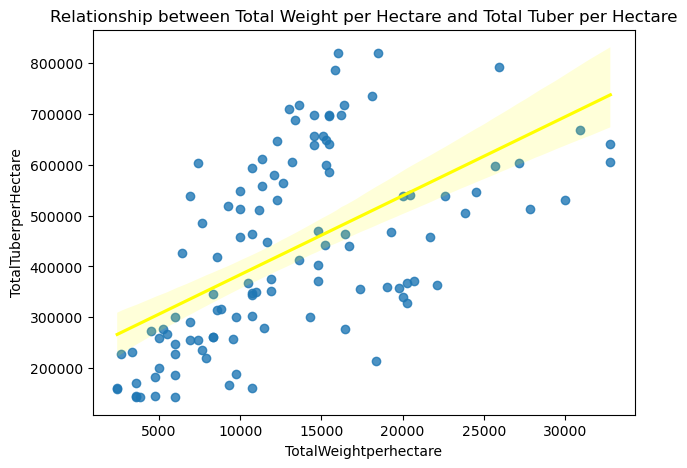

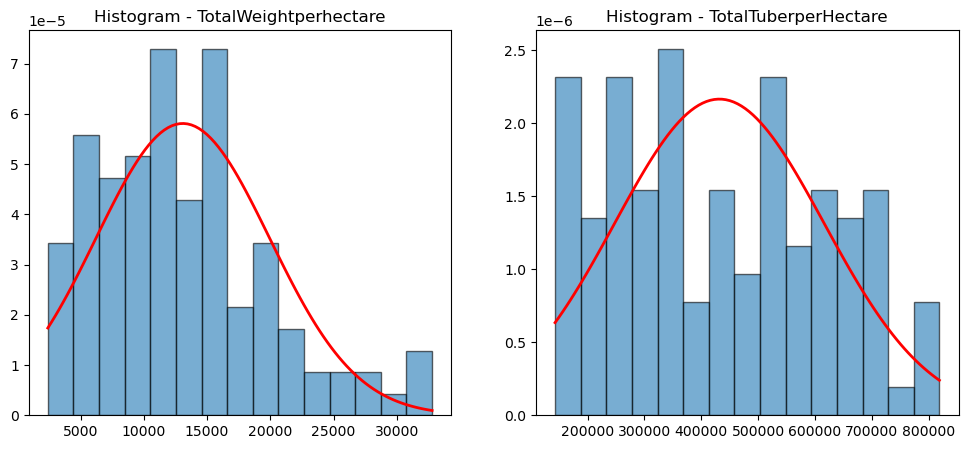

Pearson correlation: 0.576, P-value: 0.0000
Interpretation: There is a statistically significant moderate positive correlation between Total Weight per Hectare and Total Tuber per Hectare.


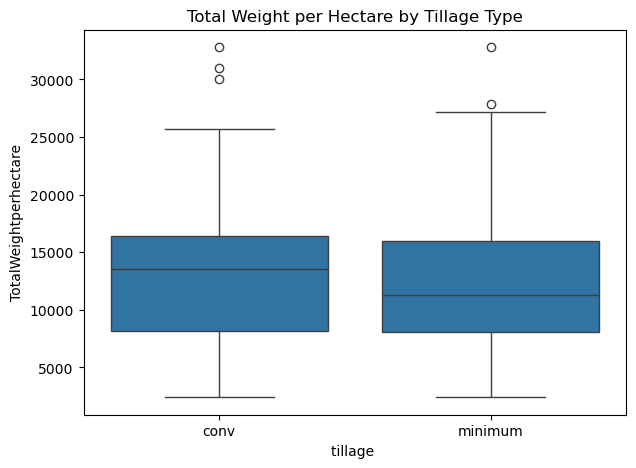

F-statistic: 0.272
P-value: 0.6031
Interpretation: There is no statistically significant difference in mean Total Weight per Hectare across tillage types.


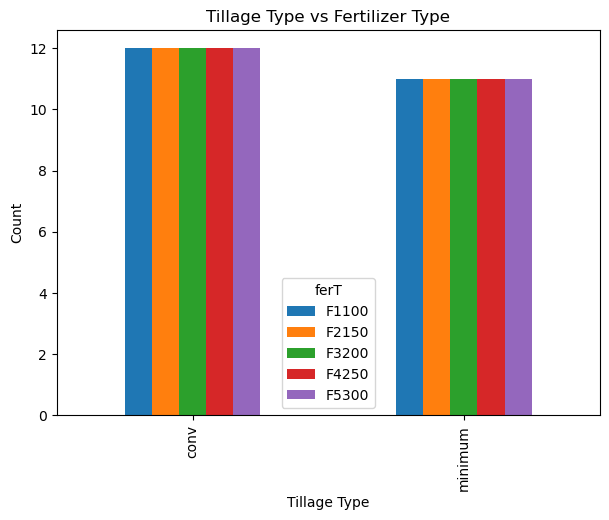

Chi-square statistic = 0.000, p-value = 1.0000, dof = 4
Interpretation: There is no statistically significant association between the two categorical variables.


In [3]:
####Question 2 Relationship between variables using display graphs and statistical tests
#Part a -Two continuous variables
#Using scatter plot for variables TotalWeightperhectare and TotalTuberperHectare

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.regplot(
    data=cassava_yield3, 
    x='TotalWeightperhectare', 
    y='TotalTuberperHectare', 
    line_kws={'color':'yellow'}
)
plt.title('Relationship between Total Weight per Hectare and Total Tuber per Hectare')
plt.show()

##Testing normality using a histogram
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(12,5))

# Histogram 1 with normal curve
plt.subplot(1,2,1)
data1 = cassava_yield3['TotalWeightperhectare']
mu1, sigma1 = data1.mean(), data1.std()
plt.hist(data1, bins=15, density=True, edgecolor='k', alpha=0.6)
x = np.linspace(data1.min(), data1.max(), 100)
plt.plot(x, norm.pdf(x, mu1, sigma1), 'r-', linewidth=2)
plt.title('Histogram - TotalWeightperhectare')

# Histogram 2 with normal curve
plt.subplot(1,2,2)
data2 = cassava_yield3['TotalTuberperHectare']
mu2, sigma2 = data2.mean(), data2.std()
plt.hist(data2, bins=15, density=True, edgecolor='k', alpha=0.6)
x = np.linspace(data2.min(), data2.max(), 100)
plt.plot(x, norm.pdf(x, mu2, sigma2), 'r-', linewidth=2)
plt.title('Histogram - TotalTuberperHectare')

plt.show()

##Statistical test 
from scipy.stats import pearsonr

# Pearson (since both variables are normally distributed)
pearson_corr, p_value = pearsonr(cassava_yield['TotalWeightperhectare'], cassava_yield['TotalTuberperHectare'])
print(f"Pearson correlation: {pearson_corr:.3f}, P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level

# Determine the strength of the correlation
if abs(pearson_corr) < 0.3:
    strength = "weak"
elif abs(pearson_corr) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

# Determine significance and direction
if p_value < alpha:
    if pearson_corr > 0:
        print(f"Interpretation: There is a statistically significant {strength} positive correlation between Total Weight per Hectare and Total Tuber per Hectare.")
    else:
        print(f"Interpretation: There is a statistically significant {strength} negative correlation between Total Weight per Hectare and Total Tuber per Hectare.")
else:
    print(f"Interpretation: There is no statistically significant correlation between Total Weight per Hectare and Total Tuber per Hectare.")


#########################################################################################################
## Part b. One continuous variable and one categoricl variable
# Using TotalWeightperhectare and tillage
# For graphic use boxlot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(
    data=cassava_yield3, 
    x='tillage ', 
    y='TotalWeightperhectare'
)
plt.title('Total Weight per Hectare by Tillage Type')
plt.show()

# Statistical test one-way anova
from scipy.stats import f_oneway

# Group the data by tillage type
groups = [group['TotalWeightperhectare'].values for name, group in cassava_yield3.groupby('tillage ')]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_val < alpha:
    print("Interpretation: There is a statistically significant difference in mean Total Weight per Hectare across tillage types.")
else:
    print("Interpretation: There is no statistically significant difference in mean Total Weight per Hectare across tillage types.")

##################################################################################################################################
#Part c Two categorical variables
## Used tillage and ferT
## Graphical display using stacked bar chart

cross_tab = pd.crosstab(cassava_yield3['tillage '], cassava_yield['ferT'])

cross_tab.plot(kind='bar', stacked=False, figsize=(7,5))
plt.title('Tillage Type vs Fertilizer Type')
plt.xlabel('Tillage Type')
plt.ylabel('Count')
plt.show()

#Statistical test - chi-square test
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square statistic = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")

# Interpretation
alpha = 0.05  # significance level

if p < alpha:
    print("Interpretation: There is a statistically significant association between the two categorical variables.")
else:
    print("Interpretation: There is no statistically significant association between the two categorical variables.")

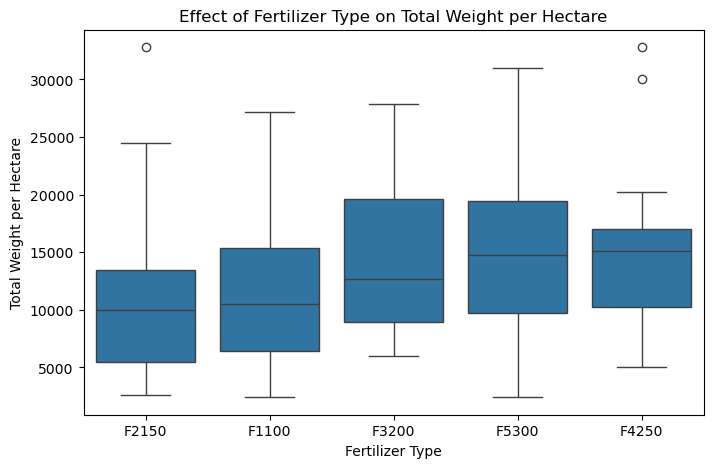

ANOVA results for TotalWeightperhectare:
F-statistic: 2.102, P-value: 0.0854
Interpretation: There is no statistically significant difference in Total Weight per hectare among fertilizer types.
Practical meaning: The choice of fertilizer type does not strongly influence cassava yield in this dataset.

ANOVA results for TotalTuberperHectare:
F-statistic: 0.400, P-value: 0.8085
Interpretation: There is no statistically significant difference in Total Weight per hectare among fertilizer types.
Practical meaning: The choice of fertilizer type does not strongly influence cassava yield in this dataset.


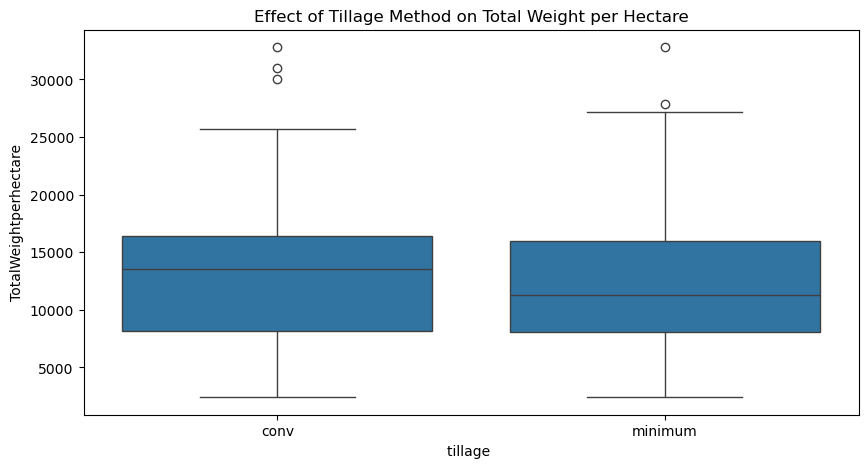

T-test for TotalWeightperhectare: t = 0.521, p = 0.6031
Interpretation: No significant effect of tillage method on Total Weight per hectare.
Practical meaning: Both conventional and minimum tillage produce similar total weight yields; farmers can choose based on other factors such as labor, cost, or soil conservation.

T-test for TotalTuberperHectare: t = 1.369, p = 0.1736
Interpretation: No significant effect of tillage method on Total Tuber per hectare.
Practical meaning: Total tuber yield is similar for both conventional and minimum tillage; farmers can make decisions based on convenience, cost, or sustainability rather than yield alone.


In [4]:
##Question 3
# Part a- Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize
plt.figure(figsize=(8,5))
sns.boxplot(data=cassava_yield3, x='ferT', y='TotalWeightperhectare')
plt.title('Effect of Fertilizer Type on Total Weight per Hectare')
plt.xlabel('Fertilizer Type')
plt.ylabel('Total Weight per Hectare')
plt.show()

# 2. Perform ANOVA for TotalWeightperhectare
groups = [group['TotalWeightperhectare'].values for name, group in cassava_yield3.groupby('ferT')]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA results for TotalWeightperhectare:")
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Interpretation: There is a statistically significant difference in Total Weight per hectare among fertilizer types.")
else:
    print("Interpretation: There is no statistically significant difference in Total Weight per hectare among fertilizer types.")
    print("Practical meaning: The choice of fertilizer type does not strongly influence cassava yield in this dataset.")

##Total tuber per hectare
groups = [group['TotalTuberperHectare'].values for name, group in cassava_yield3.groupby('ferT')]
f_stat, p_val = f_oneway(*groups)

print("\nANOVA results for TotalTuberperHectare:")
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Interpretation: There is a statistically significant difference in Total Weight per hectare among fertilizer types.")
else:
    print("Interpretation: There is no statistically significant difference in Total Weight per hectare among fertilizer types.")
    print("Practical meaning: The choice of fertilizer type does not strongly influence cassava yield in this dataset.") 

#########################################################################################################
##Part b- Does the tillage method (“conv” and “minimum”) affect the projected “TotalWeightperhectare” and "TotalTuberperHectare?"
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

alpha = 0.05 

# Visualize relationship (optional)
plt.figure(figsize=(10,5))
sns.boxplot(data=cassava_yield3, x='tillage ', y='TotalWeightperhectare')
plt.title('Effect of Tillage Method on Total Weight per Hectare')
plt.show()

# T-test for TotalWeightperhectare
groups = [group['TotalWeightperhectare'] for name, group in cassava_yield3.groupby('tillage ')]
t_stat, p_val = ttest_ind(*groups)
print(f"T-test for TotalWeightperhectare: t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < alpha:
    print("Interpretation: Tillage method has a statistically significant effect on Total Weight per hectare.")
    print("Practical meaning: Choosing between conventional and minimum tillage can affect the cassava yield. Farmers may consider the method that gives higher yield for their plots.")
else:
    print("Interpretation: No significant effect of tillage method on Total Weight per hectare.")
    print("Practical meaning: Both conventional and minimum tillage produce similar total weight yields; farmers can choose based on other factors such as labor, cost, or soil conservation.")

# T-test for TotalTuberperHectare
groups = [group['TotalTuberperHectare'] for name, group in cassava_yield3.groupby('tillage ')]
t_stat, p_val = ttest_ind(*groups)
print(f"\nT-test for TotalTuberperHectare: t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < alpha:
    print("Interpretation: Tillage method significantly affects Total Tuber per hectare.")
    print("Practical meaning: Farmers may expect different total tuber yields depending on the tillage method used.")
else:
    print("Interpretation: No significant effect of tillage method on Total Tuber per hectare.")
    print("Practical meaning: Total tuber yield is similar for both conventional and minimum tillage; farmers can make decisions based on convenience, cost, or sustainability rather than yield alone.")


In [12]:
####Question 4- Check for association between fertilisers across seasons for Cassava using a suitable mining algorithm
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

# Select relevant columns
data4 = cassava_yield3[['Sesn', 'ferT']].copy()

# Create a transaction-style dataset (one row per season)
basket = (
    data4.groupby(['Sesn', 'ferT'])['ferT']
    .count()
    .unstack()
    .fillna(0)
    .applymap(lambda x: 1 if x > 0 else 0)
)

# Apply Apriori algorithm to find frequent fertilizer combinations
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.dropna().sort_values(by='lift', ascending=False)

# Display top rules
print("Top Association Rules Between Fertilizers Across Seasons ")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

# Interpretation
if not rules.empty:
    top_rule = rules.iloc[0]
    ant = list(top_rule['antecedents'])
    con = list(top_rule['consequents'])
    print("\nInterpretation:")
    print(f"When farmers use fertilizer {ant}, they are likely to also use {con}.")
    print(f"Support: {top_rule['support']:.2f}, Confidence: {top_rule['confidence']:.2f}, Lift: {top_rule['lift']:.2f}.")
    if top_rule['lift'] > 1:
        print("Positive association: these fertilizers are often used together in the same season.")
    else:
        print("No strong association: fertilizers are used independently across seasons.")
else:
    print("No strong associations found between fertilizers across seasons.")

Top Association Rules Between Fertilizers Across Seasons 
  antecedents consequents  support  confidence  lift
0         (0)         (1)      1.0         1.0   1.0
1         (1)         (0)      1.0         1.0   1.0
2         (0)         (2)      1.0         1.0   1.0
3         (2)         (0)      1.0         1.0   1.0
4         (0)         (3)      1.0         1.0   1.0

Interpretation:
When farmers use fertilizer [0], they are likely to also use [1].
Support: 1.00, Confidence: 1.00, Lift: 1.00.
No strong association: fertilizers are used independently across seasons.


In [11]:
###Question5- Generate a predictive model for the variable "Plants_harvested" that  can be used to inform farmers and policymakers. How acurate is your model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define features 
features = ['ferT', 'tillage ', 'Sesn', 'TotalWeightperhectare', 'TotalTuberperHectare']

#Encode categorical variables
encoder = LabelEncoder()
for col in ['ferT', 'tillage ', 'Sesn']:
    cassava_yield3[col] = encoder.fit_transform(cassava_yield3[col])

# Define X and y 
X = cassava_yield3[features]
y = cassava_yield3['Plants_harvested']

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the Random Forest model 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions 
y_pred = model.predict(X_test)

#Evaluate the model 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Interpretation 
if r2 >= 0.7:
    print("Interpretation: The model has high predictive accuracy and can reliably inform farmers and policymakers.")
elif r2 >= 0.4:
    print("Interpretation: The model has moderate accuracy. It can provide general insights, but predictions should be used cautiously.")
else:
    print("Interpretation: The model has low predictive power. More data or additional variables may be needed to improve accuracy.")

Model Performance:
R-squared (R²): 0.760
Mean Absolute Error (MAE): 2.17
Root Mean Squared Error (RMSE): 3.11
Interpretation: The model has high predictive accuracy and can reliably inform farmers and policymakers.
